### Lab 10-1 MNIST with CNN (Keras)


saved model test

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.2.0


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
learning_rate = 0.01
training_epochs = 5
batch_size = 100

tf.random.set_seed(777)

11493376/11490434 [==============================] - 0s 0us/step


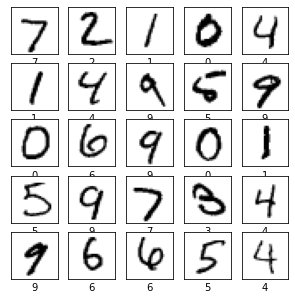

In [6]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

# test image plot 
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
    

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [7]:
# returns a compiled model
# identical to the previous one
# 가중치와 옵티마이저를 포함하여 정확히 같은 모델을 다시 만듭니다.
path = '/content/drive/My Drive/DeepLearning/model/'
model1 = tf.keras.models.load_model(path+'MNIST_adam.h5')
model2 = tf.keras.models.load_model(path+'MNIST_sgd.h5')
model3 = tf.keras.models.load_model(path+'MNIST_RMSp.h5')

In [8]:
#모델을 평가할 Test 데이타에 대한 정의
print("Adam Model Test")
score = model1.evaluate(test_images, test_labels)
print(f"Adam Test Accuracy: {score[1]*100}")
print("SGD Model Test")
score = model2.evaluate(test_images, test_labels)
print(f"SGD Test Accuracy: {score[1]*100}")
print("RMSprop Model Test")
score = model3.evaluate(test_images, test_labels)
print(f"RMSprop Test Accuracy: {score[1]*100}")

Adam Model Test
313/313 [==============================] - 4s 14ms/step - loss: 0.0285 - accuracy: 0.9910
Adam Test Accuracy: 99.09999966621399
SGD Model Test
313/313 [==============================] - 4s 14ms/step - loss: 0.1010 - accuracy: 0.9700
SGD Test Accuracy: 97.00000286102295
RMSprop Model Test
313/313 [==============================] - 5s 15ms/step - loss: 0.0269 - accuracy: 0.9919
RMSprop Test Accuracy: 99.19000267982483
